<a href="https://colab.research.google.com/github/gsb3501/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

##Phasor - pure tone (sine wave) 만드는 과정 

In [2]:
# parameter setting
amp =1        # range [0.0, 1.0], 진폭
sr = 10000    # sampling rate, Hz,  몇개의 샘플들이 1초에 들어갈 것인가.  
dur = 0.5     # in seconds, 얼마나 긴 사인 웨이브를 만들 것인지 
freq = 100.0  # sine ferquency, Hz,  반복이 되는 사이클이 1초에 몇 개 들어갈 것인지

In [3]:
# generate time
t = np.arange(1, sr * dur+1)/ sr

In [4]:
# generate phase (각도값)
theta = t * 2*np.pi * freq

In [5]:
# generate signal by cosine-phasor
s = np.sin(theta)

sin 이라는 함수에 각도값 (radian)이 들어감. 
사인 웨이브를 만들 때, 세타 값이 radian 형식으로 들어가야 한다. 
사인은 시간을 갖고있지 않음. 그래서 theta 값 (각도값) 
시간 속에 있는 각도값을 가져야한다...
시간과 phase를 연결 해줘야한다. 

Text(0, 0.5, 'real')

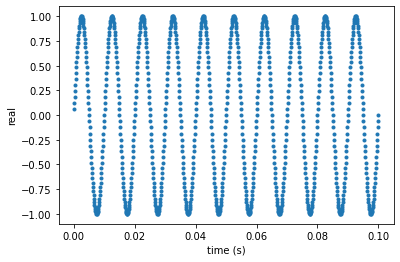

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [7]:
ipd.Audio(s, rate=sr)

In [8]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

Text(0.5, 0, 'image')

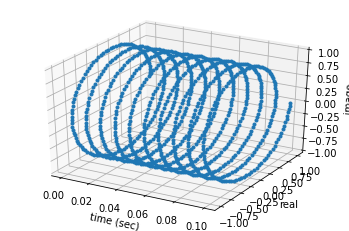

In [10]:
fig = plt.figure()
ax = plt.subplot(111, projection = '3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('image')

In [12]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [16]:
ipd.Audio(c.real, rate=sr)

In [17]:
def phasor_sine(amp, sr, dur, freq):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq
  s = np.sin(theta)

  return s, t, theta

In [21]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate = sr)

In [22]:
def phasor_complex(amp, sr, dur, freq):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq
  c = np.exp(theta*1j)

  return c, t, theta

In [24]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr) #c.imag는 sine값만 보겠다. c.real로 하면 cosine값만 보겠다는 뜻 

## Generate pulse train (=source)

In [ ]:
#기본적으로 for loop를 돌려서 freq를 바꿔가면서 source sound를 만드는 과정 

#paratmeter setting
amp =1
sr= 10000
dur = 0.5

F0 =300
Fend = int(sr/2) 

s_all = 0